# Linux Transfer Learning notebook - Summary

In [1]:
size_columns = ["GZIP-bzImage", "GZIP-vmlinux", "GZIP", "BZIP2-bzImage", "vmlinux", 
              "BZIP2-vmlinux", "BZIP2", "LZMA-bzImage", "LZMA-vmlinux", "LZMA", "XZ-bzImage", "XZ-vmlinux", "XZ", 
              "LZO-bzImage", "LZO-vmlinux", "LZO", "LZ4-bzImage", "LZ4-vmlinux", "LZ4"]

## Training model on 4.13 data

In [2]:
import pandas as pd
from sklearn import ensemble, tree
from sklearn.model_selection import train_test_split

df_413 = pd.read_pickle("datasets/dataset_413.pkl")

train_size = 0.9
X_train, X_test, y_train, y_test = train_test_split(df_413.drop(columns=size_columns+["cid"], errors="ignore"), df_413["vmlinux"], train_size=train_size)

reg = ensemble.GradientBoostingRegressor(n_estimators=100, max_depth=12, min_samples_split=100)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

dfErrorsFold = pd.DataFrame({"% error":((y_pred - y_test)/y_test).abs()*100})
error_413 = dfErrorsFold["% error"].mean()
print("MAPE for 4.13 : ", error_413)

MAPE for 4.13 :  5.007147736246703


## Importing all datasets

In [3]:
df_415 = pd.read_pickle("datasets/dataset_415.pkl")
df_420 = pd.read_pickle("datasets/dataset_420.pkl")
df_500 = pd.read_pickle("datasets/dataset_500.pkl")
df_507 = pd.read_pickle("datasets/dataset_507.pkl")

## Creating all training and test sets

In [4]:
columns_413 = set(df_413.columns.values)
columns_415 = set(df_415.columns.values)
columns_420 = set(df_420.columns.values)
columns_500 = set(df_500.columns.values)
columns_507 = set(df_507.columns.values)

In [5]:
for c in columns_413.difference(columns_415):
    df_415 = df_415.assign(**{c:1})

for c in columns_413.difference(columns_420):
    df_420 = df_420.assign(**{c:1})

for c in columns_413.difference(columns_500):
    df_500 = df_500.assign(**{c:1})

for c in columns_413.difference(columns_507):
    df_507 = df_507.assign(**{c:1})

In [6]:
train_size = 5000

X_train_415, X_test_415, y_train_415, y_test_415 = train_test_split(df_415.drop(columns=size_columns+["cid"], errors="ignore"), df_415["vmlinux"], train_size=train_size)
X_train_420, X_test_420, y_train_420, y_test_420 = train_test_split(df_420.drop(columns=size_columns+["cid"], errors="ignore"), df_420["vmlinux"], train_size=train_size)
X_train_500, X_test_500, y_train_500, y_test_500 = train_test_split(df_500.drop(columns=size_columns+["cid"], errors="ignore"), df_500["vmlinux"], train_size=train_size)
X_train_507, X_test_507, y_train_507, y_test_507 = train_test_split(df_507.drop(columns=size_columns+["cid"], errors="ignore"), df_507["vmlinux"], train_size=train_size)

## Model reuse

In [7]:
y_pred = reg.predict(X_test_415[X_train.columns])

dfErrorsFold = pd.DataFrame({"% error":((y_pred - y_test_415)/y_test_415).abs()*100})
error_415 = dfErrorsFold["% error"].mean()
print("MAPE for 4.15 : ", error_415)

MAPE for 4.15 :  17.679421157044988


In [8]:
y_pred = reg.predict(X_test_420[X_train.columns])

dfErrorsFold = pd.DataFrame({"% error":((y_pred - y_test_420)/y_test_420).abs()*100})
error_420 = dfErrorsFold["% error"].mean()
print("MAPE for 4.20 : ", error_420)

y_pred = reg.predict(X_test_500[X_train.columns])

dfErrorsFold = pd.DataFrame({"% error":((y_pred - y_test_500)/y_test_500).abs()*100})
error_500 = dfErrorsFold["% error"].mean()
print("MAPE for 5.0 : ", error_500)

y_pred = reg.predict(X_test_507[X_train.columns])

dfErrorsFold = pd.DataFrame({"% error":((y_pred - y_test_507)/y_test_507).abs()*100})
error_507 = dfErrorsFold["% error"].mean()
print("MAPE for 5.7 : ", error_507)

MAPE for 4.20 :  19.04819421480541
MAPE for 5.0 :  19.383366075624473
MAPE for 5.7 :  32.48902869261508


## Training from scratch

In [9]:
reg_415 = ensemble.GradientBoostingRegressor(n_estimators=100, max_depth=12, min_samples_split=100)
reg_415.fit(X_train_415, y_train_415)

y_pred = reg_415.predict(X_test_415)

dfErrorsFold = pd.DataFrame({"% error":((y_pred - y_test_415)/y_test_415).abs()*100})
error_415_scratch = dfErrorsFold["% error"].mean()
print("MAPE for 4.15 scratch : ", error_415_scratch)

MAPE for 4.15 scratch :  12.252710542790119


In [11]:
reg_420 = ensemble.GradientBoostingRegressor(n_estimators=100, max_depth=12, min_samples_split=100)
reg_420.fit(X_train_420, y_train_420)

y_pred = reg_420.predict(X_test_420)

dfErrorsFold = pd.DataFrame({"% error":((y_pred - y_test_420)/y_test_420).abs()*100})
error_420_scratch = dfErrorsFold["% error"].mean()
print("MAPE for 4.20 scratch : ", error_420_scratch)


reg_500 = ensemble.GradientBoostingRegressor(n_estimators=100, max_depth=12, min_samples_split=100)
reg_500.fit(X_train_500, y_train_500)

y_pred = reg_500.predict(X_test_500)

dfErrorsFold = pd.DataFrame({"% error":((y_pred - y_test_500)/y_test_500).abs()*100})
error_500_scratch = dfErrorsFold["% error"].mean()
print("MAPE for 5.0 scratch : ", error_500_scratch)


reg_507 = ensemble.GradientBoostingRegressor(n_estimators=100, max_depth=12, min_samples_split=100)
reg_507.fit(X_train_507, y_train_507)

y_pred = reg_507.predict(X_test_507)

dfErrorsFold = pd.DataFrame({"% error":((y_pred - y_test_507)/y_test_507).abs()*100})
error_507_scratch = dfErrorsFold["% error"].mean()
print("MAPE for 5.7 scratch : ", error_507_scratch)

MAPE for 4.20 scratch :  11.771949694977913
MAPE for 5.0 scratch :  11.704309483270574
MAPE for 5.7 scratch :  12.373115863413082


In [14]:
X_train_415["estimated_vmlinux"] = reg.predict(X_train_415[X_train.columns])
X_train_420["estimated_vmlinux"] = reg.predict(X_train_420[X_train.columns])
X_train_500["estimated_vmlinux"] = reg.predict(X_train_500[X_train.columns])
X_train_507["estimated_vmlinux"] = reg.predict(X_train_507[X_train.columns])

X_test_415["estimated_vmlinux"] = reg.predict(X_test_415[X_train.columns])
X_test_420["estimated_vmlinux"] = reg.predict(X_test_420[X_train.columns])
X_test_500["estimated_vmlinux"] = reg.predict(X_test_500[X_train.columns])
X_test_507["estimated_vmlinux"] = reg.predict(X_test_507[X_train.columns])

## Model shifting

In [18]:

shifting_gbt_415 = ensemble.GradientBoostingRegressor(n_estimators=200, max_depth=6, min_samples_split=50)
shifting_gbt_415.fit(X_train_415, y_train_415)

y_pred = shifting_gbt_415.predict(X_test_415)

dfErrorsFold = pd.DataFrame({"% error":((y_pred - y_test_415)/y_test_415).abs()*100})
error_415_shifting = dfErrorsFold["% error"].mean()
print("MAPE for 4.15 shifting : ", error_415_shifting)

MAPE for 4.15 shifting :  6.311641375430209


In [20]:
shifting_gbt_420 = ensemble.GradientBoostingRegressor(n_estimators=200, max_depth=6, min_samples_split=50)
shifting_gbt_420.fit(X_train_420, y_train_420)

y_pred = shifting_gbt_420.predict(X_test_420)

dfErrorsFold = pd.DataFrame({"% error":((y_pred - y_test_420)/y_test_420).abs()*100})
error_420_shifting = dfErrorsFold["% error"].mean()
print("MAPE for 4.20 shifting : ", error_420_shifting)


shifting_gbt_500 = ensemble.GradientBoostingRegressor(n_estimators=200, max_depth=6, min_samples_split=50)
shifting_gbt_500.fit(X_train_500, y_train_500)

y_pred = shifting_gbt_500.predict(X_test_500)

dfErrorsFold = pd.DataFrame({"% error":((y_pred - y_test_500)/y_test_500).abs()*100})
error_500_shifting = dfErrorsFold["% error"].mean()
print("MAPE for 5.0 shifting : ", error_500_shifting)


shifting_gbt_507 = ensemble.GradientBoostingRegressor(n_estimators=200, max_depth=6, min_samples_split=50)
shifting_gbt_507.fit(X_train_507, y_train_507)

y_pred = shifting_gbt_507.predict(X_test_507)

dfErrorsFold = pd.DataFrame({"% error":((y_pred - y_test_507)/y_test_507).abs()*100})
error_507_shifting = dfErrorsFold["% error"].mean()
print("MAPE for 5.7 shifting : ", error_507_shifting)



MAPE for 4.20 shifting :  6.473663536704875
MAPE for 5.0 shifting :  6.779563709785829
MAPE for 5.7 shifting :  8.151901990142788


## Plotting

In [23]:
df = pd.DataFrame(
{
    "4.13":{
        "reuse":error_413
    },
    "4.15":{
        "reuse":error_415,
        "scratch":error_415_scratch,
        "model_shifting":error_415_shifting
    },
    "4.20":{
        "reuse":error_420,
        "scratch":error_420_scratch,
        "model_shifting":error_420_shifting
    },
    "5.0":{
        "reuse":error_500,
        "scratch":error_500_scratch,
        "model_shifting":error_500_shifting
    },
    "5.7":{
        "reuse":error_507,
        "scratch":error_507_scratch,
        "model_shifting":error_507_shifting
    }
}).T

In [24]:
df

,reuse,scratch,model_shifting
4.13,5.007148,NaN,NaN
4.15,17.679421,12.252711,6.311641
4.20,19.048194,11.771950,6.473664
5.0,19.383366,11.704309,6.779564
5.7,32.489029,12.373116,8.151902


Text(0.5, 1.0, 'Error variation on different versions')

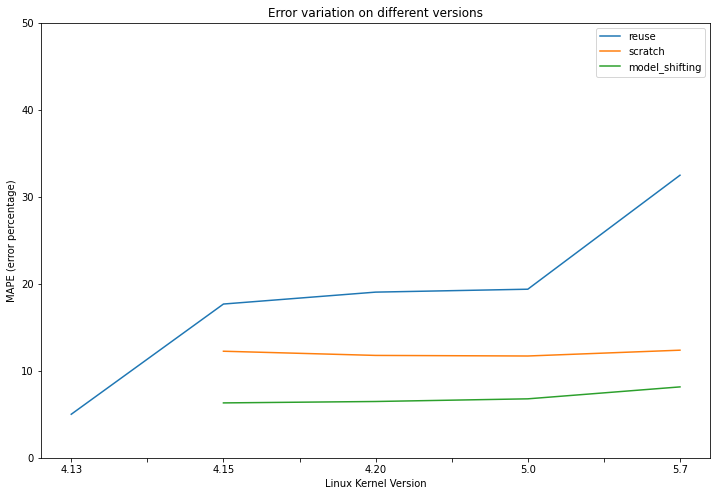

In [29]:
ax = df.plot(figsize=(12,8), ylim=(0, 50))
ax.set_ylabel("MAPE (error percentage)")
ax.set_xlabel("Linux Kernel Version")
ax.set_title("Error variation on different versions")


The blue line is the error of the 4.13 model on the different versions. Orange line is the error rate for models build from scratch on 5000 examples of the studied version. Green line is the shifting of the 4.13 model using 5000 examples from the studied version.